# Predicting Mortgage Backed Securities Prepayment Risk Prediction

# **First Task : Data Preprocessing**

The different steps for this first task are as follows:
1. Data Cleaning
2. Data Encoding
3. Data Labeling

# **Blueprint of Project**
1. Exploratory Data Analysis(EDA)
2. Data Cleaning & Preprocessing
3. Model Building & Evaluation
4. Deployment


## Importing Data & Needed Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import matplotlib
warnings.filterwarnings("always")

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# First Look at the data


In [ ]:
data = pd.read_csv('LoanExport.csv')
data.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-63-674adbca6759>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('LoanExport.csv')


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
5,0,199902,N,202901,X,25,1,O,89,40,...,80400,F199Q1224802,N,360,2,Ot,Other servicers,0,0,42
6,0,199902,N,202901,X,25,1,O,90,21,...,53100,F199Q1291436,P,360,1,RE,Other servicers,0,0,44
7,0,199902,X,202901,36740,0,1,O,72,20,...,32800,F199Q1001824,N,360,1,NO,WELLSFARGOBANKNA,1,3,145
8,0,199902,Y,202710,25540,30,1,O,95,38,...,6400,F199Q1079744,P,345,1,Ot,Other servicers,0,0,64
9,0,199902,Y,202901,48620,30,1,O,95,27,...,67000,F199Q1196318,P,360,1,Ot,WELLSFARGOBANKNA,1,104,212


# **Exploratory Data Analysis(EDA)**

In [ ]:
# Checking informations about our features
data.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

## Data Preprocessing & EDA

In [ ]:
data.describe()

In [ ]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(291451, 28)

In [ ]:
# Checking informations about our features
data.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

# 1. Data Cleaning

## Missing values treatment

In [ ]:
# Checking for missing values
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

We see that according to the isnull() function, only "SellerName" has missing values.
However we'll look at the variable description to make sure that others columns don't have missing values.

In [ ]:
#Check if there's any categorical features in our data
data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

###  MaturityDate:


In [ ]:
# Convert date feature to datetime format
data['MaturityDate'] = data['MaturityDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###  FirstPaymentDate :


In [ ]:
data['FirstPaymentDate'] = data['FirstPaymentDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Visualize the change on dtypes of features
data.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         291451 non-null  int64         
 1   FirstPaymentDate    291451 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  291451 non-null  object        
 3   MaturityDate        291451 non-null  datetime64[ns]
 4   MSA                 291451 non-null  object        
 5   MIP                 291451 non-null  int64         
 6   Units               291451 non-null  int64         
 7   Occupancy           291451 non-null  object        
 8   OCLTV               291451 non-null  int64         
 9   DTI                 291451 non-null  int64         
 10  OrigUPB             291451 non-null  int64         
 11  LTV                 291451 non-null  int64         
 12  OrigInterestRate    291451 non-null  float64       
 13  Channel             291451 no

In [ ]:
#View description of all of our features
num1_cols = data.describe(include='all')
num1_cols

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-36-8997d036efc4>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  num1_cols = data.describe(include='all')
<ipython-input-36-8997d036efc4>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  num1_cols = data.describe(include='a

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451,291451,291451,291451,291451.000000,291451.000000,291451,291451.000000,291451.000000,...,291451,291451,291451,291451.000000,291451,266457,291451,291451.000000,291451.000000,291451.000000
unique,NaN,66,3,96,392,NaN,NaN,3,NaN,NaN,...,1767,291451,3,NaN,3,20,20,NaN,NaN,NaN
top,NaN,1999-05-01 00:00:00,N,2029-04-01 00:00:00,X,NaN,NaN,O,NaN,NaN,...,94500,F199Q1268030,P,NaN,2,Ot,Other servicers,NaN,NaN,NaN
freq,NaN,104071,184154,104210,39100,NaN,NaN,276131,NaN,NaN,...,2582,1,123404,NaN,187335,76943,64043,NaN,NaN,NaN
first,NaN,1999-01-01 00:00:00,NaN,2024-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2013-03-01 00:00:00,NaN,2043-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,708.936991,NaN,NaN,NaN,NaN,9.216685,1.026022,NaN,76.960529,30.033453,...,NaN,NaN,NaN,359.835375,NaN,NaN,NaN,0.197848,1.837729,60.805291
std,68.408791,NaN,NaN,NaN,NaN,12.648273,0.202986,NaN,15.236154,13.203974,...,NaN,NaN,NaN,2.286939,NaN,NaN,NaN,0.398378,8.809392,46.142599
min,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,NaN,NaN,NaN,301.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,675.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,70.000000,22.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,34.000000


In [ ]:
#Count number of distinct elements in axis 0.
data.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore              370
FirstPaymentDate          66
FirstTimeHomebuyer         3
MaturityDate              96
MSA                      392
MIP                       37
Units                      5
Occupancy                  3
OCLTV                    102
DTI                       66
OrigUPB                  375
LTV                       97
OrigInterestRate         254
Channel                    4
PPM                        3
ProductType                1
PropertyState             53
PropertyType               7
PostalCode              1767
LoanSeqNum            291451
LoanPurpose                3
OrigLoanTerm              61
NumBorrowers               3
SellerName                20
ServicerName              20
EverDelinquent             2
MonthsDelinquent         174
MonthsInRepayment        212
dtype: int64

In [ ]:
data["EverDelinquent"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    233788
1     57663
Name: EverDelinquent, dtype: int64

In [ ]:
print("Seller Name size: \n",data.SellerName.value_counts(),"\n\n")

Seller Name size: 
 Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: SellerName, dtype: int64 




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Return unique values based on a hash table.
data['FirstTimeHomebuyer'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['N', 'X', 'Y'], dtype=object)

In [ ]:
# X means No
# Y means Yes
# X means Unknown value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#PPM (Prepayment Penalty Indicator):

In [ ]:
data['PPM'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['N', 'X', 'Y'], dtype=object)

In [ ]:
data['NumBorrowers'].unique()
# X  means unknown value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['2', '1', 'X '], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

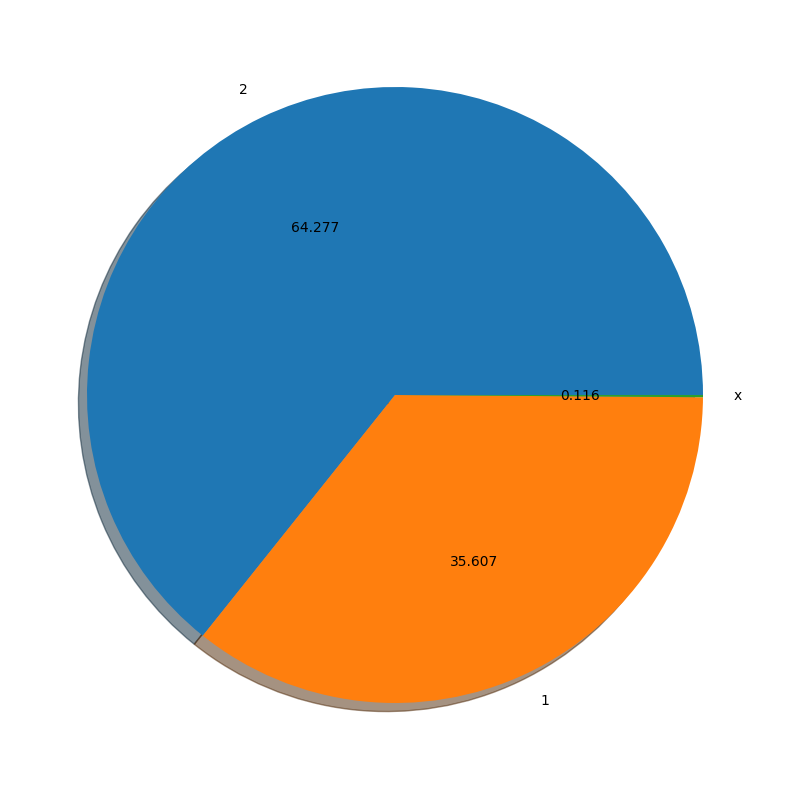

In [ ]:
#draw piechart of NumBorrowers to see the distribution of its values
label_arr=['2','1','x']
draw_piechart('NumBorrowers',label_arr)

# Data Encoding

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


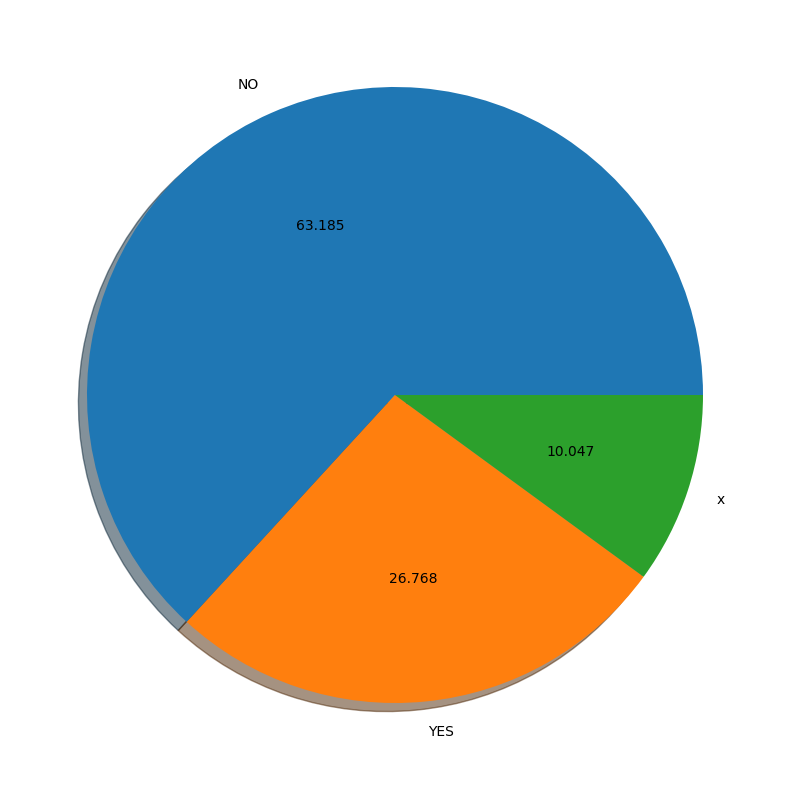

In [ ]:
#draw piechart of FirstTimeHomebuyer to see the distribution of its values

label_arr=['NO','YES','x']
draw_piechart('FirstTimeHomebuyer',label_arr)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


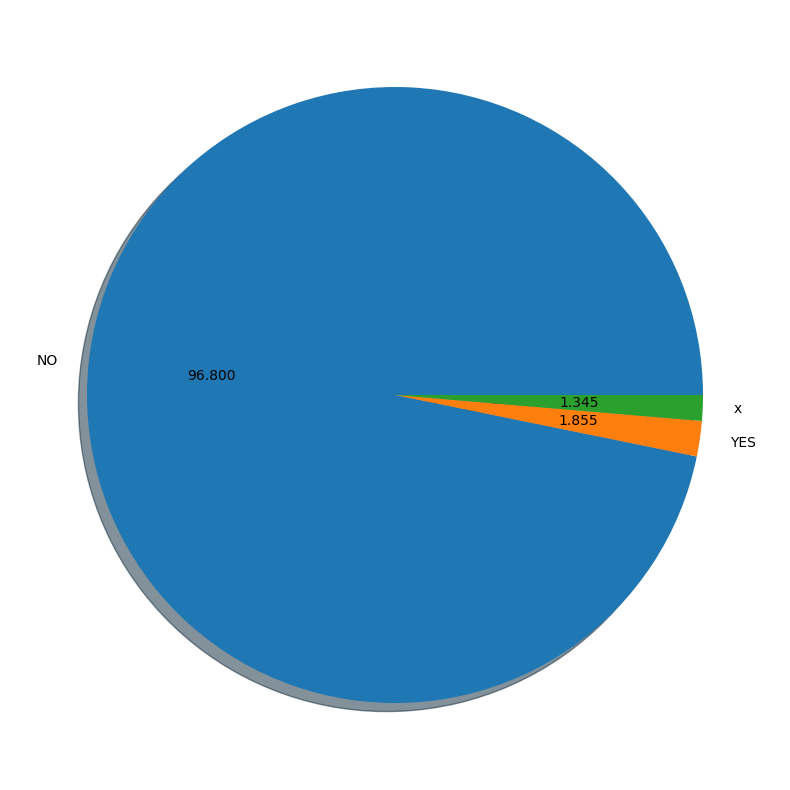

In [ ]:
#draw piechart of PPM to see the distribution of its values
label_arr=['NO','YES','x']
draw_piechart('PPM',label_arr)

#Occupacy

In [ ]:
data['Occupancy'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['O', 'I', 'S'], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


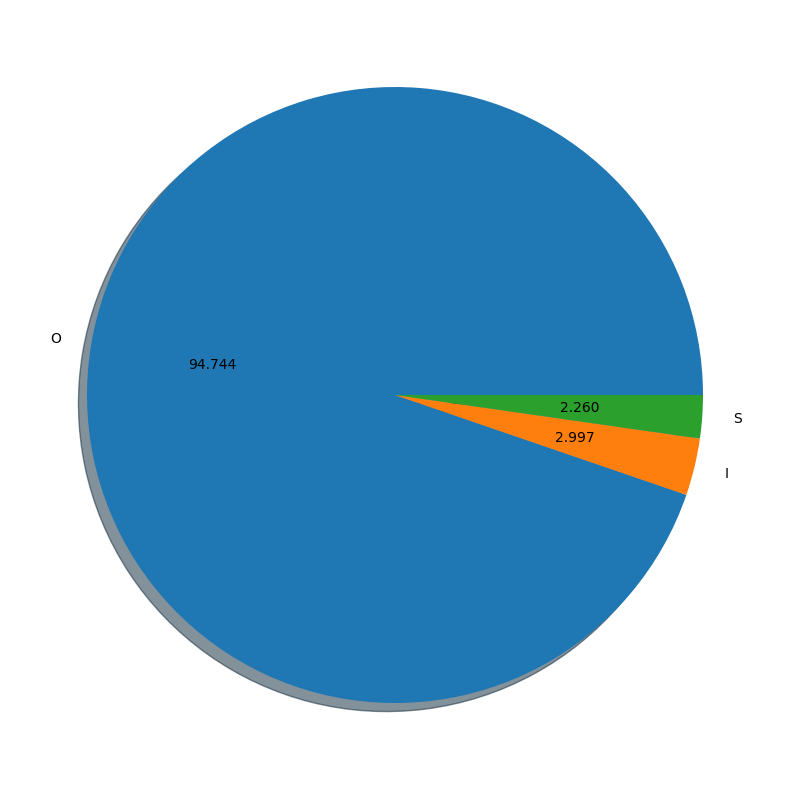

In [ ]:
#draw piechart of Occupancy to see the distribution of its values
label_arr=['O','I','S']
draw_piechart('Occupancy',label_arr)

In [ ]:
data['PostalCode'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


94500    2582
30000    2374
48100    2166
85200    2155
48000    1976
         ... 
79500       1
26600       1
41400       1
36900       1
41300       1
Name: PostalCode, Length: 1767, dtype: int64

In [ ]:
data['LoanPurpose'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['P', 'N', 'C'], dtype=object)

In [ ]:
data['LoanPurpose'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


P    123404
N    110036
C     58011
Name: LoanPurpose, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


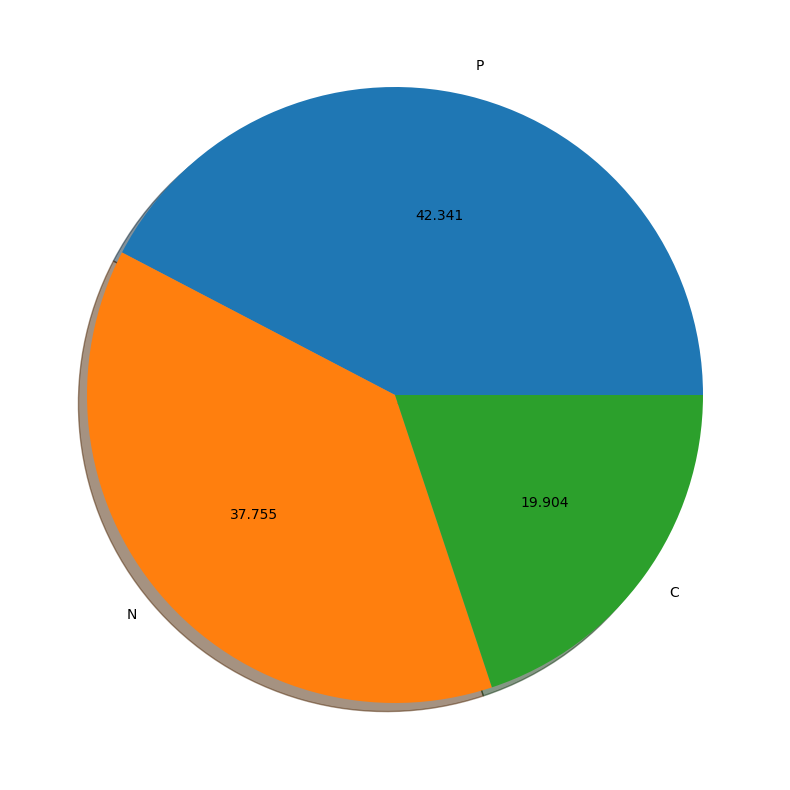

In [ ]:
#draw piechart of LoanPurpose to see the distribution of its values

label_arr=['P','N','C']
draw_piechart('LoanPurpose',label_arr)

In [ ]:
data['Channel'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['T', 'R', 'C', 'B'], dtype=object)

#Data Encoding (Label Encoding)

In [ ]:
#Convert categorial feature to numerical one by label_encoding function defined earlier
label_encoding('Channel')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Property State

In [ ]:
data['PropertyState'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['IL', 'CO', 'KS', 'CA', 'NJ', 'WI', 'FL', 'CT', 'GA', 'TX', 'MD',
       'MA', 'SC', 'WY', 'NC', 'AZ', 'IN', 'MS', 'NY', 'WA', 'AR', 'VA',
       'MN', 'LA', 'PA', 'OR', 'RI', 'UT', 'MI', 'TN', 'AL', 'MO', 'IA',
       'NM', 'NV', 'VT', 'OH', 'NE', 'HI', 'ID', 'PR', 'DC', 'GU', 'KY',
       'NH', 'SD', 'ME', 'MT', 'OK', 'WV', 'DE', 'ND', 'AK'], dtype=object)

In [ ]:
#Convert it to numerical
label_encoding('PropertyState')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Property  Type

In [ ]:
data['PropertyType'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH', 'X '], dtype=object)

In [ ]:
#Convert it to numerical
label_encoding('PropertyType')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Outliers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

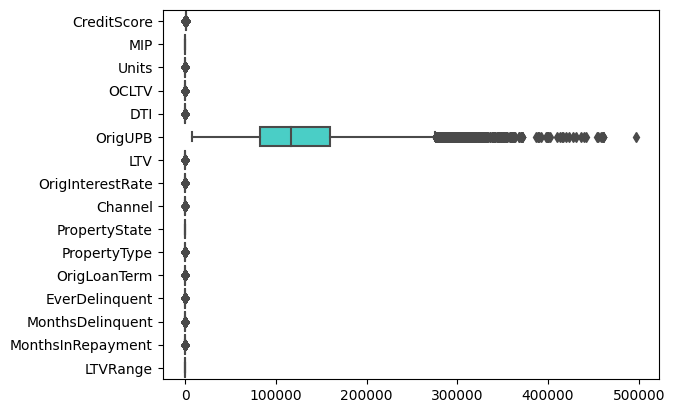

In [ ]:
sns.boxplot(data=data,palette='rainbow',orient='h')
#box plot to all features to show outliers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


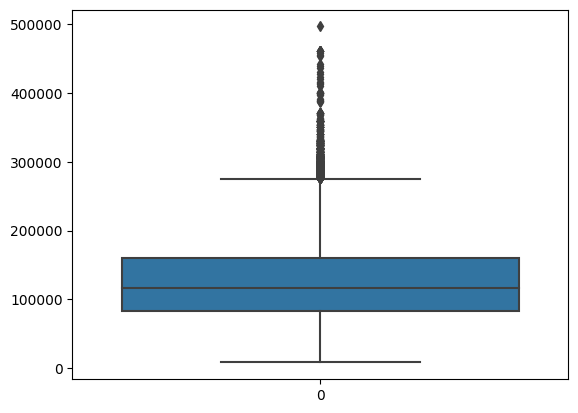

In [ ]:
draw_boxplot('OrigUPB')

In [ ]:
#drop outliers
upp,low=handle_outlier(data['OrigUPB'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['OrigUPB']=np.where(data['OrigUPB']>upp,upp,data['OrigUPB'])
data['OrigUPB']=np.where(data['OrigUPB']<low,low,data['OrigUPB'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


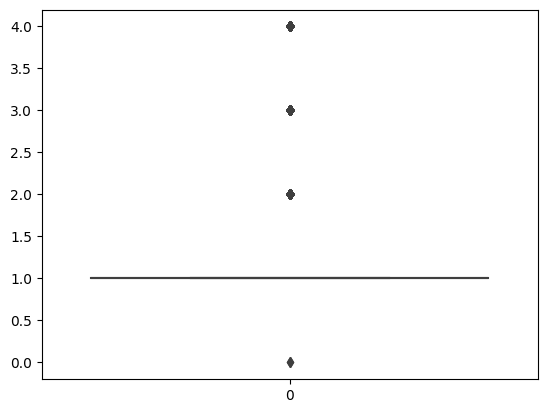

In [ ]:
draw_boxplot('Units')

In [ ]:
upper,lower=handle_outlier(data['Units'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['Units']=np.where(data['Units']>upper,upper,data['Units'])
data['Units']=np.where(data['Units']<lower,lower,data['Units'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


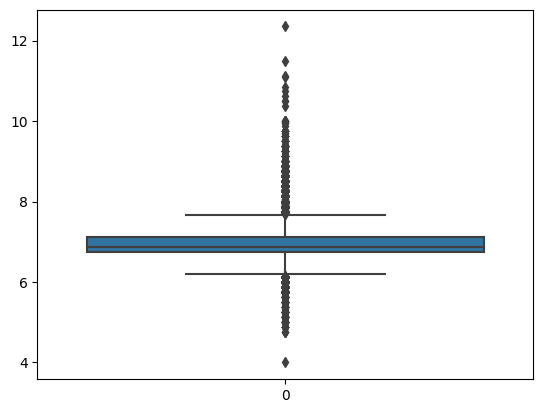

In [ ]:
draw_boxplot('OrigInterestRate')

In [ ]:
uppero,lowero=handle_outlier(data['OrigInterestRate'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['OrigInterestRate']=np.where(data['OrigInterestRate']>uppero,uppero,data['OrigInterestRate'])
data['OrigInterestRate']=np.where(data['OrigInterestRate']<lowero,lowero,data['OrigInterestRate'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#checking for duplicates values to drop them
duplicate=data.duplicated()
print(duplicate.sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0


In [ ]:
data=data.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
duplicate=data.duplicated()
print(duplicate.sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0


# Data

In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_Y,CreditRange,LTVRange,RepayRange
0,0,25,1.0,89,27,275500.0,89,7.6875,360,0,0,52,0,0,1,0,poor,0,high
1,0,0,1.0,73,17,275500.0,73,7.6875,360,0,0,144,0,1,0,0,poor,1,high
2,0,0,1.0,75,16,275500.0,75,7.6875,360,0,0,67,0,1,0,0,poor,2,high
3,0,0,1.0,76,14,275500.0,76,7.6875,360,0,0,35,0,1,0,0,poor,2,high
4,0,0,1.0,78,18,275500.0,78,7.6875,360,0,0,54,0,1,0,0,poor,2,high


In [ ]:
import pandas as pd

def calculate_credit_range(row):
    if row['CreditScore'] >= 750:
        return 'excellent'
    elif row['CreditScore'] >= 700:
        return 'good'
    elif row['CreditScore'] >= 650:
        return 'fair'
    else:
        return 'poor'

def calculate_ltv_range(row):
    if row['LTV'] < 75:
        return 'low'
    elif row['LTV'] >= 75 and row['LTV'] < 80:
        return 'medium'
    elif row['LTV'] >= 80 and row['LTV'] < 90:
        return 'high'
    else:
        return 'very high'

def calculate_repay_range(row):
    if row['OrigInterestRate'] < 4:
        return 'low'
    elif row['OrigInterestRate'] >= 4 and row['OrigInterestRate'] < 6:
        return 'medium'
    else:
        return 'high'

data['CreditRange'] = data.apply(calculate_credit_range, axis=1)
data['LTVRange'] = data.apply(calculate_ltv_range, axis=1)
data['RepayRange'] = data.apply(calculate_repay_range, axis=1)


# convert categorical ranges to numerical features
credit_range_dummies = pd.get_dummies(data['CreditRange'], prefix='CreditRange')
label_encoding('LTVRange')
repay_range_dummies = pd.get_dummies(data['RepayRange'], prefix='RepayRange')

# concatenate the newly created numerical features to the original data
raw_data = pd.concat([data, credit_range_dummies, repay_range_dummies], axis=1)

# drop the original categorical ranges
raw_data = raw_data.drop(['CreditRange', 'RepayRange'], axis=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
raw_data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



CreditScore              0
MIP                      0
Units                    0
OCLTV                    0
DTI                      0
OrigUPB                  0
LTV                      0
OrigInterestRate         0
OrigLoanTerm             0
EverDelinquent           0
MonthsDelinquent         0
MonthsInRepayment        0
LoanPurpose_C            0
LoanPurpose_N            0
LoanPurpose_P            0
FirstTimeHomebuyer_Y     0
LTVRange                 0
CreditRange_excellent    0
CreditRange_fair         0
CreditRange_good         0
CreditRange_poor         0
RepayRange_high          0
dtype: int64

#MonthsDelinquent

In [ ]:
data.drop(["MonthsInRepayment",'MonthsDelinquent'],axis=1,inplace=True)
raw_data.drop(["MonthsInRepayment",'MonthsDelinquent'],axis=1,inplace=True)
#because they are strongly corrolated with the target and causes data leakage (over fitting)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#EverDelinquent

In [ ]:
x=raw_data.drop(['EverDelinquent'], axis=1)
y=raw_data['EverDelinquent']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#calculating z score to know how far from mean value (by calculating standard deviation)
#help you to know more about data
from scipy import stats
z_score=np.abs(stats.zscore(data))
print (z_score)

        CreditScore       MIP  Units     OCLTV       DTI  OrigUPB       LTV  \
0         10.362576  1.251897    NaN  0.793001  0.231585      NaN  0.795063   
1         10.362576  0.727358    NaN  0.255700  0.989403      NaN  0.254395   
2         10.362576  0.727358    NaN  0.124612  1.065184      NaN  0.123213   
3         10.362576  0.727358    NaN  0.059069  1.216748      NaN  0.057622   
4         10.362576  0.727358    NaN  0.072019  0.913621      NaN  0.073561   
...             ...       ...    ...       ...       ...      ...       ...   
291446     1.902391  0.727358    NaN  1.107769  0.147323      NaN  1.107079   
291447     1.917010  0.727358    NaN  0.255700  2.277692      NaN  0.254395   
291448     1.917010  0.727358    NaN  0.255700  0.071541      NaN  0.254395   
291449     1.990103  0.727358    NaN  0.203107  1.814521      NaN  0.204743   
291450     2.048577  0.727358    NaN  1.959838  0.080022      NaN  1.959764   

        OrigInterestRate  OrigLoanTerm  EverDelinqu

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
x.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



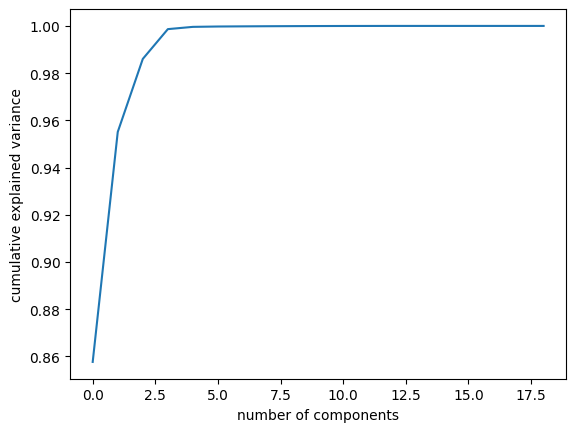

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stat_data = scaler.fit_transform(x)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
x.isnull().sum()

In [ ]:
x.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_Y,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high
CreditScore,1.000000,-0.164231,NaN,-0.191703,-0.097953,NaN,-0.191939,NaN,-0.008218,0.013017,-0.004887,-0.005742,-0.049522,-0.090964,0.553040,-0.277644,0.173184,-0.605578,NaN
MIP,-0.164231,1.000000,NaN,0.694339,0.110530,NaN,0.695445,NaN,0.014721,-0.326472,-0.154936,0.416634,0.264519,0.610330,-0.178515,0.103281,-0.007442,0.111063,NaN
Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OCLTV,-0.191703,0.694339,NaN,1.000000,0.115357,NaN,0.999468,NaN,0.018321,-0.309954,-0.140204,0.388782,0.243288,0.394348,-0.232267,0.128816,0.018069,0.113190,NaN
DTI,-0.097953,0.110530,NaN,0.115357,1.000000,NaN,0.114973,NaN,0.028304,-0.003822,-0.063931,0.065903,0.056466,0.060414,-0.143619,0.092863,0.014413,0.048705,NaN
OrigUPB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LTV,-0.191939,0.695445,NaN,0.999468,0.114973,NaN,1.000000,NaN,0.018237,-0.310022,-0.140010,0.388647,0.243452,0.395537,-0.232337,0.128951,0.017811,0.113466,NaN
OrigInterestRate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OrigLoanTerm,-0.008218,0.014721,NaN,0.018321,0.028304,NaN,0.018237,NaN,1.000000,0.016196,-0.032079,0.018397,0.014984,0.009831,-0.017640,0.007298,0.008531,0.001854,NaN
LoanPurpose_C,0.013017,-0.326472,NaN,-0.309954,-0.003822,NaN,-0.310022,NaN,0.016196,1.000000,-0.390316,-0.426481,-0.166940,-0.155517,-0.009031,0.012560,0.007734,-0.014929,NaN


In [ ]:
x.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



CreditScore              0
MIP                      0
Units                    0
OCLTV                    0
DTI                      0
OrigUPB                  0
LTV                      0
OrigInterestRate         0
OrigLoanTerm             0
LoanPurpose_C            0
LoanPurpose_N            0
LoanPurpose_P            0
FirstTimeHomebuyer_Y     0
LTVRange                 0
CreditRange_excellent    0
CreditRange_fair         0
CreditRange_good         0
CreditRange_poor         0
RepayRange_high          0
dtype: int64

#Data Frame

In [ ]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(x,y)
print(mi_score)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[0.03544527 0.00674717 0.04846482 0.00727582 0.00452166 0.06179659
 0.00691259 0.03351629 0.05402412 0.00559748 0.01904744 0.02428682
 0.00103658 0.01180514 0.0259171  0.01206402 0.02132452 0.01987189
 0.04939934]


In [ ]:
from sklearn.feature_selection import chi2
best_features=SelectKBest(score_func=chi2,k=10)
fit=best_features.fit(x,y)
df_scores= pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(x.columns)
features_score =pd.concat([df_col,df_scores], axis=1)
features_score.columns=['feature','score']
features_score.sort_values(by=['score'],ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,feature,score
0,CreditScore,82313.364214
1,MIP,18965.503893
17,CreditRange_poor,10713.083319
4,DTI,6351.661197
14,CreditRange_excellent,5646.301434
6,LTV,4025.526627
3,OCLTV,4004.643940
15,CreditRange_fair,2039.242517
16,CreditRange_good,1383.901767
13,LTVRange,297.554751


In [ ]:
selector=SelectKBest(mutual_info_classif,k=15)
x_selected=selector.fit_transform(x,y)
cols=selector.get_support(indices=True)
selected_features = x.iloc[:,cols].columns.tolist()
selected_features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['CreditScore',
 'MIP',
 'Units',
 'OCLTV',
 'OrigUPB',
 'OrigInterestRate',
 'OrigLoanTerm',
 'LoanPurpose_N',
 'LoanPurpose_P',
 'LTVRange',
 'CreditRange_excellent',
 'CreditRange_fair',
 'CreditRange_good',
 'CreditRange_poor',
 'RepayRange_high']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



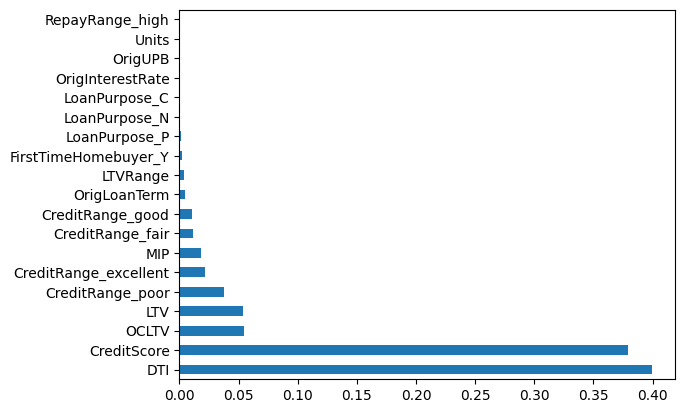

In [ ]:
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

#Modelling

In [ ]:
from sklearn.model_selection import train_test_split


# separate features and labels
import pandas as pd
df_selected = pd.DataFrame(X_selected)
# features = df_selected

df_labels = pd.DataFrame(y)
labels = df_labels["EverDelinquent"]


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
    test_size=0.25, random_state= 8)


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



X_train shape: (173587, 6)
X_test shape: (57863, 6)
y_train shape: (173587,)
y_test shape: (57863,)
X_val shape: (173587,)
y val shape: (57863,)


In [ ]:
features.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(289313, 6)

In [ ]:
labels.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(289313,)

In [ ]:
labels.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0    231680
1     57633
Name: EverDelinquent, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarnin

In [ ]:
y_train_smote.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0    139060
1    139060
Name: EverDelinquent, dtype: int64

#Regression

In [ ]:
from sklearn.feature_selection import mutual_info_regression
discrete_features = x.dtypes == int
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y)
mi_scores[::]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



OrigUPB                  0.048225
CreditScore              0.034692
CreditRange_poor         0.019272
CreditRange_excellent    0.016287
OrigLoanTerm             0.007627
MIP                      0.005890
CreditRange_good         0.005343
LTVRange                 0.005115
LTV                      0.005066
OCLTV                    0.005044
CreditRange_fair         0.002760
DTI                      0.002340
LoanPurpose_P            0.001450
FirstTimeHomebuyer_Y     0.001238
RepayRange_high          0.000933
OrigInterestRate         0.000832
LoanPurpose_C            0.000697
LoanPurpose_N            0.000159
Units                    0.000000
Name: MI Scores, dtype: float64

In [ ]:
raw_data.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent', 'LoanPurpose_C',
       'LoanPurpose_N', 'LoanPurpose_P', 'FirstTimeHomebuyer_Y', 'LTVRange',
       'CreditRange_excellent', 'CreditRange_fair', 'CreditRange_good',
       'CreditRange_poor', 'RepayRange_high'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


# Define the number of top features to select
N = 11

# Select top N features based on mutual information
selector = SelectKBest(score_func=mutual_info_regression, k=N)
X_selected = selector.fit_transform(x, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = x.columns[selected_feature_indices].tolist()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df_selected = pd.DataFrame(X_selected)

df_selected.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x= scaler.fit_transform(x)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
pca=PCA(n_components=6)
pca.fit(x)
features=pca.transform(x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## SVC Model (Support Vector Machine)

In [ ]:
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
model=LinearSVC()
model.fit(X_train_smote, y_train_smote)
train_pred=model.predict(X_train)
y_preds=model.predict(X_test)

print(f"Training score = {metrics.accuracy_score(y_train,train_pred)}")
print(f"Testing score = {metrics.accuracy_score(y_test,y_preds)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Training score = 0.6575319580383323
Testing score = 0.6578124189896826


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:


training_accuracy = accuracy_score(y_train,train_pred)*100
print('training data accuracy is:', training_accuracy)
print()

clf_report = classification_report(y_train,train_pred)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_train,train_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



training data accuracy is: 65.75319580383324

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76    139060
           1       0.32      0.62      0.42     34527

    accuracy                           0.66    173587
   macro avg       0.60      0.64      0.59    173587
weighted avg       0.76      0.66      0.69    173587




array([[92864, 46196],
       [13252, 21275]])

In [ ]:
confusion_matrix(y_test,y_preds)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([[30899, 15374],
       [ 4426,  7164]])

In [ ]:
accuracy_score(y_test,y_preds)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.6578124189896826

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_preds)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.6429367410916721

SVC works well with the data but this is not the best accuracy

#Deployment


In [ ]:
import joblib
joblib.dump(rf,'model.joblib')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['model.joblib']

In [ ]:
# save the pca using joblib
joblib.dump(pca,'pca.joblib')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pca.joblib']